In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [30]:
# Read the data set
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [31]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [32]:
df.shape

(100000, 9)

In [33]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [34]:
#Drop empty rows
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [37]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB


In [39]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [40]:
x = df.drop('diabetes', axis=1)

In [41]:
y = df['diabetes']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [53]:
#Decision Tree 
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(x_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

In [55]:
print("---------------------------------Decision Tree Model---------------------------------")
print("Accuracy: %.2f%%" % (accuracy_decision_tree * 100.0))
print("-----------------------------------------------------------------------------------------")

---------------------------------Decision Tree Model---------------------------------
Accuracy: 95.20%
-----------------------------------------------------------------------------------------


In [56]:
#Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred_logistic = logistic_model.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

C:\Users\Shashika Idushan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print("---------------------------------Logistic Regression Model---------------------------------")
print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))
print("-----------------------------------------------------------------------------------------")

---------------------------------Logistic Regression Model---------------------------------
Accuracy: 95.06%
-----------------------------------------------------------------------------------------


In [58]:
#Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
y_pred_random_forest = random_forest_model.predict(x_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

In [59]:
print("---------------------------------Random Forest Model---------------------------------")
print("Accuracy: %.2f%%" % (accuracy_random_forest * 100.0))
print("-----------------------------------------------------------------------------------------")

---------------------------------Random Forest Model---------------------------------
Accuracy: 97.00%
-----------------------------------------------------------------------------------------


In [60]:
#SVM Model
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [61]:
print("---------------------------------SVM Model---------------------------------")
print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))
print("-----------------------------------------------------------------------------------------")

---------------------------------SVM Model---------------------------------
Accuracy: 94.66%
-----------------------------------------------------------------------------------------


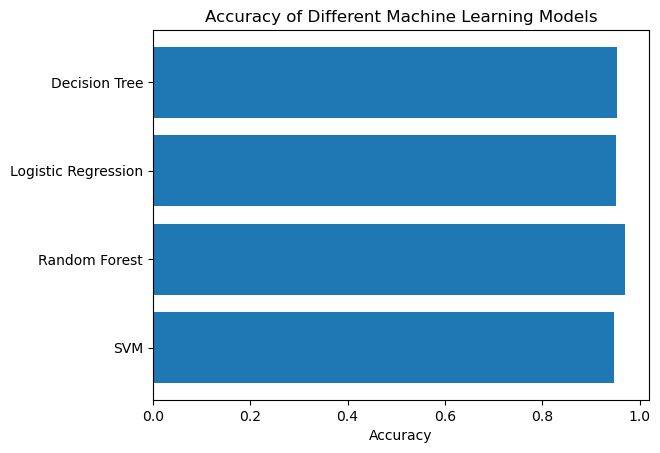

In [62]:
# Plot the results
fig, ax = plt.subplots()
names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVM']
results = [accuracy_decision_tree, accuracy_logistic, accuracy_random_forest, accuracy_svm]
y_pos = np.arange(len(names))
ax.barh(y_pos, results, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy of Different Machine Learning Models')
plt.show()